In [14]:
u"""
This module implements a convolutional netwrok using Pytorch initialized via transfer learning
to learn to classify between our true and false documents.
This code is adapted from pytorch tutorial which can be found here:
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html#sphx-glr-beginner-transfer-learning-tutorial-py
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import copy

In [15]:
path1 = ('C:\\Users\\pedro\\Desktop\\SRI\\SRI2018')
os.chdir(path1)

1) Qual transformação?

2) Dataloader - Combina o dataset com um amostrador (sampler), quais parâmetros?

In [16]:
plt.ion()   # interactive mode

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(np.random.randint(30,45)),
        transforms.RandomCrop(224), # 224
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        # transforms.Resize(256),
        transforms.CenterCrop(224), #224
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


data_dir = 'C:\\Users\\pedro\\Desktop\\SRI\\SRI2018\\dados'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=6,
                                             shuffle=False, num_workers=32)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#


3) Modelo treinado: Quais parâmetros?

In [17]:
model_ft = torch.load('deeplearning_best_model',map_location={'cuda:0': 'cpu'})

4) Calculando true_values

5) Calculando as probabilidades

6) Calculuando os predicted_values

7) Calculando a taxa de acertos no treino

### Train

In [18]:
list1 = []
train_true_values = []
val_true_values = []
train_file_name = []
val_file_name = []
for i,j in enumerate(dataloaders['train'].dataset.imgs):
    train_true_values.append(j[1])
    list1.append(j[0])
    if 'falso' in list1[i]:
        train_file_name.append(list1[i][53:len(list1[i])])
    else:
        train_file_name.append(list1[i][58:len(list1[i])])

list1 = []        
for i,j in enumerate(dataloaders['val'].dataset.imgs):
    val_true_values.append(j[1])
    list1.append(j[0])
    if 'falso' in list1[i]:
        val_file_name.append(list1[i][51:len(list1[i])])
    else:
        val_file_name.append(list1[i][56:len(list1[i])])

In [19]:
list4 = []
list5 = []
train_pred_values = []
train_pseudo_probs = []
with torch.no_grad():
    for tensor_count, (inputs, labels) in enumerate(dataloaders['train']):    
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        list4.append(preds)
        #print(len(list4))
        if len(list4[tensor_count])==6:
            for j in range(0,6):
                train_pred_values.append(list4[tensor_count][j].item())
        else:
            for j in range(0,2):
                train_pred_values.append(list4[tensor_count][j].item())
        list5.append(outputs)
        #print(len(list5))
        m = nn.Softmax()
        if len(list5[tensor_count])==6:
            for j in range(0,6):
                 train_pseudo_probs.append((m(list5[tensor_count][j])).tolist())
        else:
            for j in range(0,2):
                 train_pseudo_probs.append((m(list5[tensor_count][j])).tolist()) 

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


## Validation

In [20]:
list4 = []
list5 = []
val_pred_values = []
val_pseudo_probs = []

with torch.no_grad():
    for tensor_count, (inputs, labels) in enumerate(dataloaders['val']):    
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        list4.append(preds)
        #print(len(list4))
        if len(list4[tensor_count])==6:
            for j in range(0,6):
                val_pred_values.append(list4[tensor_count][j].item())
        else:
            for j in range(0,2):
                val_pred_values.append(list4[tensor_count][j].item())
        list5.append(outputs)
        #print(len(list5))
        m = nn.Softmax()
        if len(list5[tensor_count])==6:
            for j in range(0,6):
                 val_pseudo_probs.append((m(list5[tensor_count][j])).tolist())
        else:
            for j in range(0,2):
                 val_pseudo_probs.append((m(list5[tensor_count][j])).tolist()) 

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [21]:
#for n, i in enumerate(train_true_values):
#    if i == 0:
#        train_true_values[n] = "False"
#    else:
#        train_true_values[n] = "True"

In [22]:
list_train_prob = []
for i in range(len(train_pseudo_probs)):
    list_train_prob.append(train_pseudo_probs[i][0])

In [23]:
list_val_prob = []
for i in range(len(val_pseudo_probs)):
    list_val_prob.append(val_pseudo_probs[i][0])

8) Calcular a ROC Curve (Train)

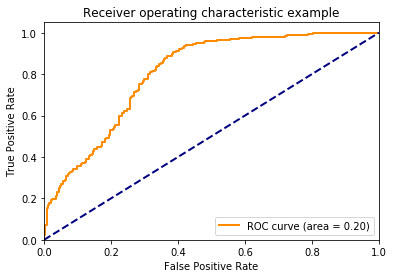

In [24]:
import numpy as np
from sklearn import metrics

y = np.array(train_true_values)
scores = np.array(list_train_prob)
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
roc_auc = metrics.auc(fpr, tpr)
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(tpr, fpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

8.1) Calcular a ROC Curve (Val)

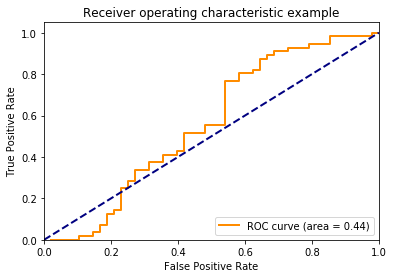

In [25]:
y = np.array(val_true_values)
scores = np.array(list_val_prob)
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
roc_auc = metrics.auc(fpr, tpr)
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(tpr, fpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

9) Calcular a matriz de confusão

10) Criar o dataframe para análise dos erros

In [27]:
columns = {'filename':train_file_name, 'pred_values':train_pred_values,'true_values':train_true_values}
df_train = pd.DataFrame(columns)
df_train['checking'] = df_train['true_values'] == df_train['pred_values']
df_train['checking'] = df_train['checking'].replace(True, 'Right')
df_train['checking'] = df_train['checking'].replace(False, 'Wrong')
df_train['checking'].value_counts()

Right    520
Wrong    136
Name: checking, dtype: int64

In [28]:
df_train['final_number'] = df_train.filename.str.extract('(\d+)').astype(int)
df_train['bounds'] = df_train['final_number'].diff()
df_train['bounds2'] = df_train['true_values'].diff()
df_train['bounds'] = df_train['bounds'].fillna(0)
df_train['bounds2'] = df_train['bounds2'].fillna(0).astype(int)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


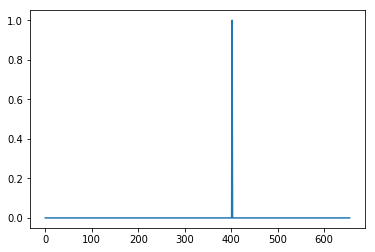

In [29]:
plt.plot(df_train['bounds2'])

In [30]:
(df_train['bounds2'] != 1).value_counts()

True     655
False      1
Name: bounds2, dtype: int64

In [31]:
df_train['bounds'][1] <= 2 & df_train['bounds2'][1] != 1

False

In [32]:
for i in range(len(df_train)):
    print(df_train['bounds'][i])
    print(df_train['bounds2'][i])
    print(df_train['bounds'][i] <= 2 | df_train['bounds2'][i] != 1)
    #print(df_train['bounds'][i] <= 2)
    #print(df_train['bounds2'][i] != 1)

0.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
57.0
0
False
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
Tr

In [33]:
j = 1
df_train['tipo'] = 0
for i in range(len(df_train)):
    if abs(df_train['bounds'][i]) <= 2 | df_train['bounds2'][i] != 1:
        df_train['tipo'][i] = 'tipo {}'.format(j)
    else:
        j += 1
        df_train['tipo'][i] = 'tipo {}'.format(j)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pedro\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
df_train.groupby(['tipo']).checking.value_counts(normalize=True)

tipo     checking
tipo 1   Right       0.900000
         Wrong       0.100000
tipo 10  Wrong       0.882353
         Right       0.117647
tipo 11  Wrong       1.000000
tipo 12  Right       0.866667
         Wrong       0.133333
tipo 13  Wrong       0.838710
         Right       0.161290
tipo 14  Wrong       1.000000
tipo 2   Right       0.846154
         Wrong       0.153846
tipo 3   Right       0.973451
         Wrong       0.026549
tipo 4   Right       0.565217
         Wrong       0.434783
tipo 5   Wrong       0.857143
         Right       0.142857
tipo 6   Right       1.000000
tipo 7   Right       1.000000
tipo 8   Right       0.950820
         Wrong       0.049180
tipo 9   Right       0.915385
         Wrong       0.084615
Name: checking, dtype: float64

Identificando quantas câmeras tiraram foto

In [35]:
df_train.groupby(['tipo']).checking.value_counts()

tipo     checking
tipo 1   Right        36
         Wrong         4
tipo 10  Wrong        30
         Right         4
tipo 11  Wrong        15
tipo 12  Right        26
         Wrong         4
tipo 13  Wrong        26
         Right         5
tipo 14  Wrong        14
tipo 2   Right        55
         Wrong        10
tipo 3   Right       110
         Wrong         3
tipo 4   Right        13
         Wrong        10
tipo 5   Wrong         6
         Right         1
tipo 6   Right        82
tipo 7   Right        11
tipo 8   Right        58
         Wrong         3
tipo 9   Right       119
         Wrong        11
Name: checking, dtype: int64

11) Criar o dataframe para análise dos erros - Validação

In [38]:
columns = {'filename':val_file_name, 'pred_values':val_pred_values,'true_values':val_true_values}
df_val = pd.DataFrame(columns)
df_val['checking'] = df_val['true_values'] == df_val['pred_values']
df_val['checking'] = df_val['checking'].replace(True, 'Right')
df_val['checking'] = df_val['checking'].replace(False, 'Wrong')
df_val['checking'].value_counts()

Right    57
Wrong    47
Name: checking, dtype: int64

In [39]:
df_val['final_number'] = df_val.filename.str.extract('(\d+)').astype(int)
df_val['bounds'] = df_val['final_number'].diff()
df_val['bounds2'] = df_val['true_values'].diff()
df_val['bounds'] = df_val['bounds'].fillna(0)
df_val['bounds2'] = df_val['bounds2'].fillna(0).astype(int)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [41]:
(df_val['bounds2'] != 1).value_counts()

True     103
False      1
Name: bounds2, dtype: int64

In [42]:
df_val['bounds'][1] <= 2 & df_val['bounds2'][1] != 1

False

In [43]:
for i in range(len(df_val)):
    print(df_val['bounds'][i])
    print(df_val['bounds2'][i])
    print(df_val['bounds'][i] <= 2 | df_val['bounds2'][i] != 1)
    #print(df_val['bounds'][i] <= 2)
    #print(df_val['bounds2'][i] != 1)

0.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
5896.0
1
False
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
-8843.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.0
0
True
1.

In [44]:
j = 1
df_val['tipo'] = 0
for i in range(len(df_val)):
    if abs(df_val['bounds'][i]) <= 2 | df_val['bounds2'][i] != 1:
        df_val['tipo'][i] = 'tipo {}'.format(j)
    else:
        j += 1
        df_val['tipo'][i] = 'tipo {}'.format(j)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pedro\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
df_val.groupby(['tipo']).checking.value_counts(normalize=True)

tipo    checking
tipo 1  Right       1.000000
tipo 2  Wrong       1.000000
tipo 3  Wrong       0.972222
        Right       0.027778
Name: checking, dtype: float64

In [46]:
df_val.groupby(['tipo']).checking.value_counts()

tipo    checking
tipo 1  Right       56
tipo 2  Wrong       12
tipo 3  Wrong       35
        Right        1
Name: checking, dtype: int64

Confusion matrix, without normalization
[[366  36]
 [100 154]]
Normalized confusion matrix
[[0.91 0.09]
 [0.39 0.61]]


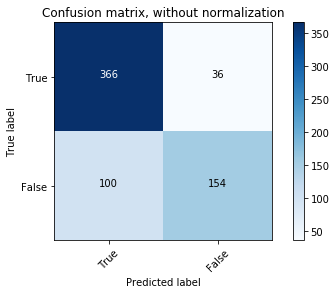

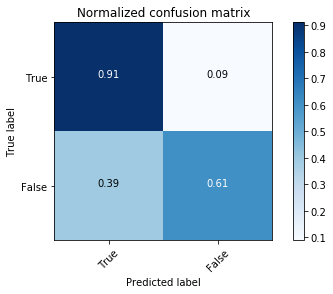

In [36]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y_test = np.array(df_train.true_values)
y_pred = np.array(df_train.pred_values)
class_names = np.array(['True', 'False'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[56  0]
 [47  1]]
Normalized confusion matrix
[[1.   0.  ]
 [0.98 0.02]]


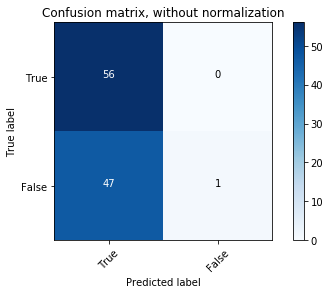

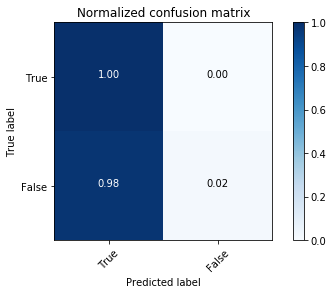

In [47]:
y_test = np.array(df_val.true_values)
y_pred = np.array(df_val.pred_values)
class_names = np.array(['True', 'False'])

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Validação

Calculando a taxa de acertos na validação

In [8]:
val_true_values = []
list2 = []
val_file_name = []
for i,j in enumerate(dataloaders['val'].dataset.imgs):
    val_true_values.append(j[1])
    list1.append(j[0])
    if 'falso' in list1[i]:
        val_file_name.append(list1[i][53:len(list1[i])])
    else:
        val_file_name.append(list1[i][58:len(list1[i])])

In [9]:
list3 = []
val_pred_values = []
with torch.no_grad():
    for tensor_count, (inputs, labels) in enumerate(dataloaders['val']):
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        list3.append(preds)
        if len(list3[tensor_count])==6:
             for j in range(0,6):
                val_pred_values.append(list3[tensor_count][j].item())
        else:
            for j in range(0,2):
                val_pred_values.append(list3[tensor_count][j].item())     

In [10]:
columns = {'filename':val_file_name, 'pred_values':val_pred_values,'true_values':val_true_values}
df_val = pd.DataFrame(columns)

In [11]:
df_val['checking'] = df_val['true_values'] == df_val['pred_values']

In [12]:
df_val['checking'].value_counts()

True     57
False    47
Name: checking, dtype: int64

In [ ]:
model_ft = torch.load('deeplearning_best_model',map_location={'cuda:0': 'cpu'})
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, nesterov=True)
phase = 'val'

for inputs, labels in dataloaders[phase]:
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        # track history if only in train
        # track history if only in train
        with torch.set_grad_enabled(phase == 'val'):
            print("Inputs:{}".format(inputs))
            outputs = model_ft(inputs)
            _, preds = torch.max(outputs, 1)
            print("Preds:{}".format(preds))
            loss = criterion(outputs, labels)

In [ ]:
def load_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

#    best_model_wts = copy.deepcopy(model.state_dict())
#    best_acc = 0.0
    model = torch.load('deeplearning_best_model',map_location={'cuda:0': 'cpu'})
    num_epochs = 25
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        model.eval()

        # Each epoch has a training and validation phase
      #  for phase in ['train', 'val']:
      #      if phase == 'train':
      #          scheduler.step()
      #          model.train()  # Set model to training mode
      #     else:
               
        running_loss = 0.0
        running_corrects = 0
    
        phase = 'val'
    # Iterate over data.
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            # track history if only in train
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                visualize_model(outputs)
                loss = criterion(outputs, labels)



        # deep copy the model
        #if phase == 'val' and epoch_acc > best_acc:
            #best_acc = epoch_acc
            #best_model_wts = copy.deepcopy(model.state_dict())

            print()

    
        # load best model weights
        #model_ft.load_state_dict(best_model_wts)
        return outputs



In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def show_training_data():
    # Get a batch of training data
    inputs, classes = next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    imshow(out, title=[class_names[x] for x in classes])

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)




In [ ]:
model_ft = torch.load('deeplearning_best_model',map_location={'cuda:0': 'cpu'})
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, nesterov=True)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = load_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                           num_epochs=100)

In [ ]:
with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['train']):
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        print(preds)

In [ ]:
plt.ion()   # interactive mode

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(np.random.randint(30,45)),
        transforms.RandomCrop(224), # 224
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        # transforms.Resize(256),
        transforms.CenterCrop(224), #224
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

#Copiar
data_dir = 'C:\\Users\\pedro\\Desktop\\SRI\\SRI2018\\dados'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=6,
                                             shuffle=True, num_workers=32)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def show_training_data():
    # Get a batch of training data
    inputs, classes = next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    imshow(out, title=[class_names[x] for x in classes])


def visualize_model(model, num_images=2):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            preds.sub_(0.5).div_(0.5) 
            torchvision.utils.save_image(preds, 'pred{}'.format(class_names[preds[i]]))
            #plt.savefig('pred{}.png'.format(i))
                    
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)
        

if __name__ == "__main__":

    show_training_data()
    
    model_ft = torch.load('deeplearning_best_model',map_location={'cuda:0': 'cpu'})
    #model_ft = models.resnet34(pretrained=True)
    #num_ftrs = model_ft.fc.in_features
    #model_ft.fc = nn.Linear(num_ftrs, 2)

    #model_ft = model_ft.to(device)

    criterion = nn.CrossEntropyLoss()
    
    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    #model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                           #num_epochs=50)
    # model_ft.state('mytraining.pt')
    #torch.save(model_ft,'best_model')
    

    visualize_model(model_ft)

1) Dataloaders
2) Modificar a train model!
3) Matriz de confusão - matriz de outputs + vetor de labels
4) phase [val, train]
5) Model.eval()
6) Curva AUC e Matriz de confusão (Scikit-learn)